https://www.kaggle.com/ahmadjaved097/analyzing-the-google-playstore

In [1]:
df = pd.read_csv('/Users/kimjeongseob/Desktop/Github upload/5.EDA/EDA 프로젝트/googleplaystore.csv')
df.tail(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


```
1. App: Application name
2. Category: Category the app belongs to
3. Rating: Overall user rating of the app (as when scraped)
4. Reviews: Number of user reviews for the app (as when scraped)
5. Size: Size of the app (as when scraped)
6. Installs: Number of user downloads/installs for the app (as when scraped)
7. Type: Paid or Free
8. Price: Price of the app (as when scraped)
9. Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
10.Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
11. Last Updated: Date when the app was last updated on Play Store (as when scraped)
12. Current Ver: Current version of the app available on Play Store (as when scraped)
13. Android Ver: Min required Android version (as when scraped)
```

# 데이터 전처리

### 1. Install 컬럼 log

In [2]:
# '+', ',' 문자 제거

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+',''))
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',',''))

In [3]:
# 10472행 제거(Installs = free)

df = df.drop(index = 10472)

In [4]:
# object -> int 형 변환
df['Installs'] = pd.to_numeric(df['Installs'])

In [5]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int64

In [6]:
df['Installs_log'] = np.log10(df.Installs)

In [7]:
df['Installs_log'].loc[df.Installs_log == float('-inf')] = 0

In [8]:
df.Installs_log.unique()

array([4.     , 5.69897, 6.69897, 7.69897, 5.     , 4.69897, 6.     ,
       7.     , 3.69897, 8.     , 9.     , 3.     , 8.69897, 1.69897,
       2.     , 2.69897, 1.     , 0.     , 0.69897])

In [9]:
df.tail(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_log
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,10000000,Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,7.0


### Checking features of each column given in the dataset


### 1. Category


In [10]:
print('Different types of App Categories as present in the dataset are: ')
print('--------------------------------------------------------------------')

count = 1
for i in df['Category'].unique():
    print(count,': ',i)
    count = count + 1

Different types of App Categories as present in the dataset are: 
--------------------------------------------------------------------
1 :  ART_AND_DESIGN
2 :  AUTO_AND_VEHICLES
3 :  BEAUTY
4 :  BOOKS_AND_REFERENCE
5 :  BUSINESS
6 :  COMICS
7 :  COMMUNICATION
8 :  DATING
9 :  EDUCATION
10 :  ENTERTAINMENT
11 :  EVENTS
12 :  FINANCE
13 :  FOOD_AND_DRINK
14 :  HEALTH_AND_FITNESS
15 :  HOUSE_AND_HOME
16 :  LIBRARIES_AND_DEMO
17 :  LIFESTYLE
18 :  GAME
19 :  FAMILY
20 :  MEDICAL
21 :  SOCIAL
22 :  SHOPPING
23 :  PHOTOGRAPHY
24 :  SPORTS
25 :  TRAVEL_AND_LOCAL
26 :  TOOLS
27 :  PERSONALIZATION
28 :  PRODUCTIVITY
29 :  PARENTING
30 :  WEATHER
31 :  VIDEO_PLAYERS
32 :  NEWS_AND_MAGAZINES
33 :  MAPS_AND_NAVIGATION


```
There are 34 different app categories present in the Google Playstore.
The 34th category(1.9) is some what different from other app categories.Checking it
```

In [11]:
df[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_log


In [12]:
# 데이터 제거 - 10472 행

df = df.drop(df.index[[10472]])

### Countplot of Number of Apps on the basis of category


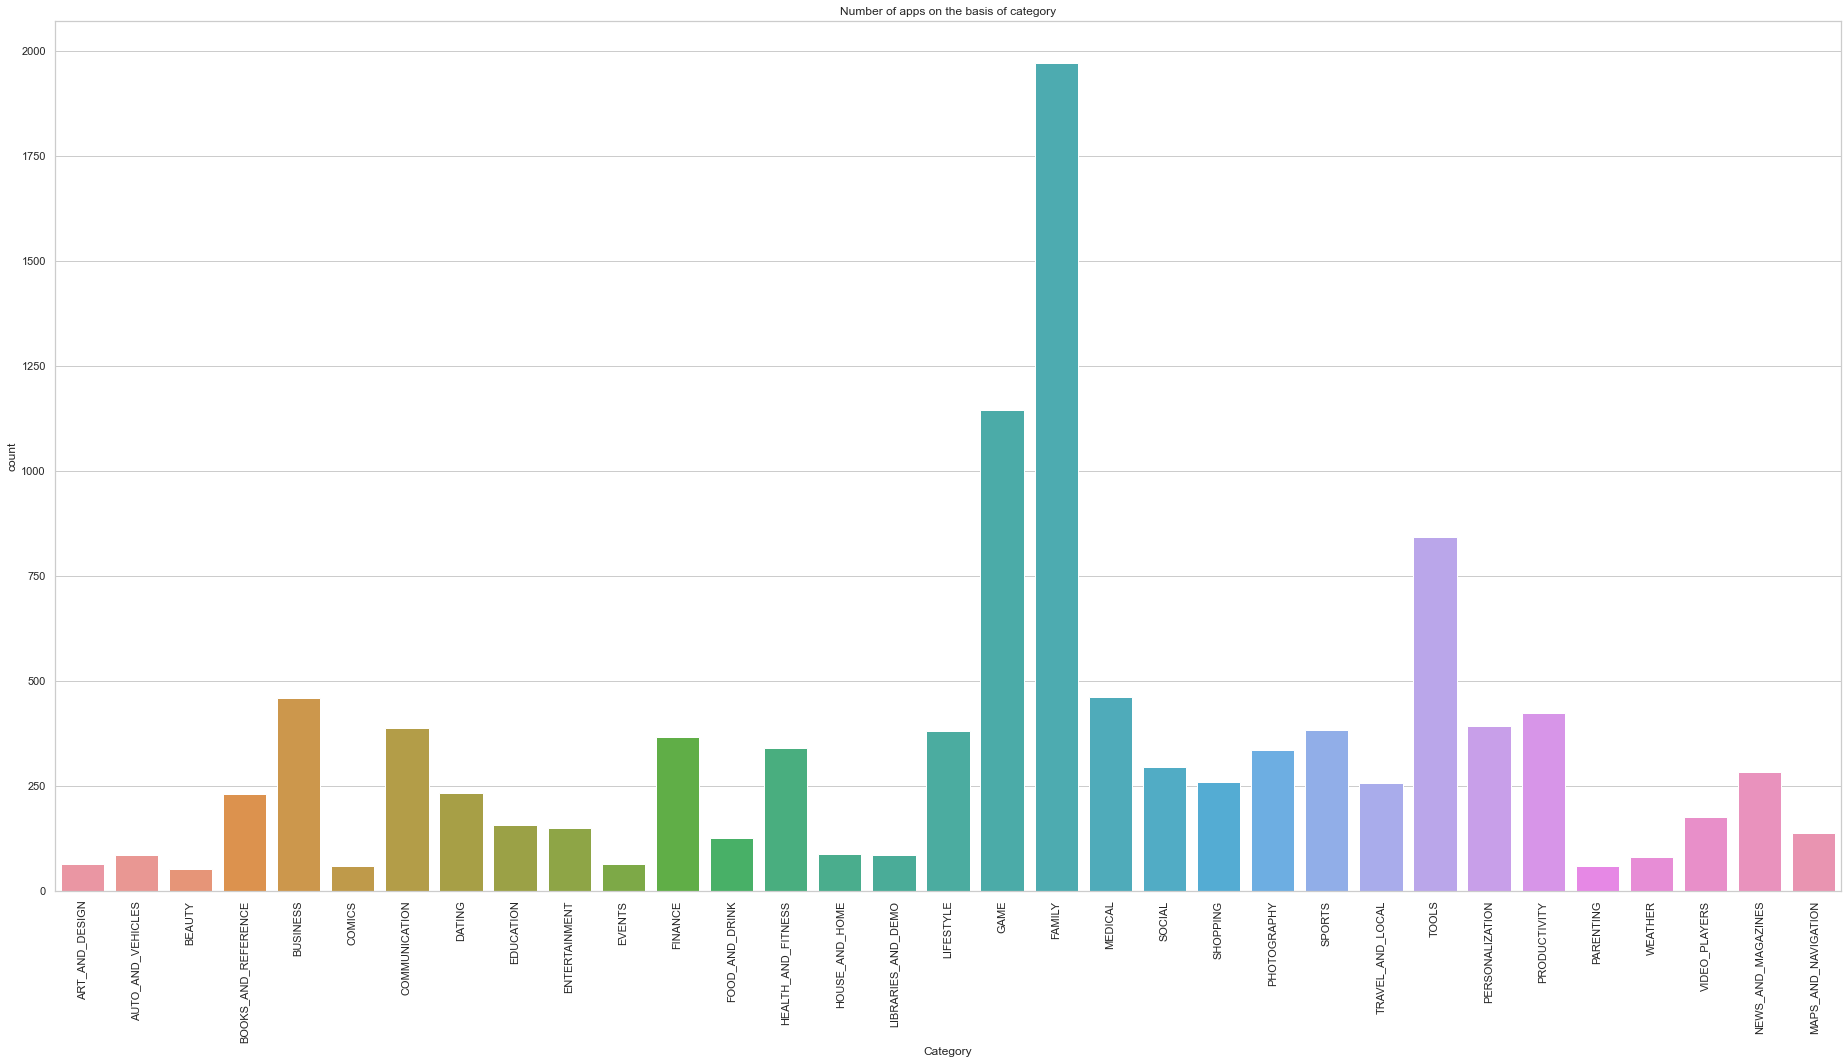

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(32,16))
plt.title('Number of apps on the basis of category')
sns.countplot(x='Category',data = df)
plt.xticks(rotation=90)
plt.show()

```
Most of the apps in the playstore belong to the Family category followed by Games category.
```

### Top 10 App Categories

In [14]:
category = pd.DataFrame(df['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

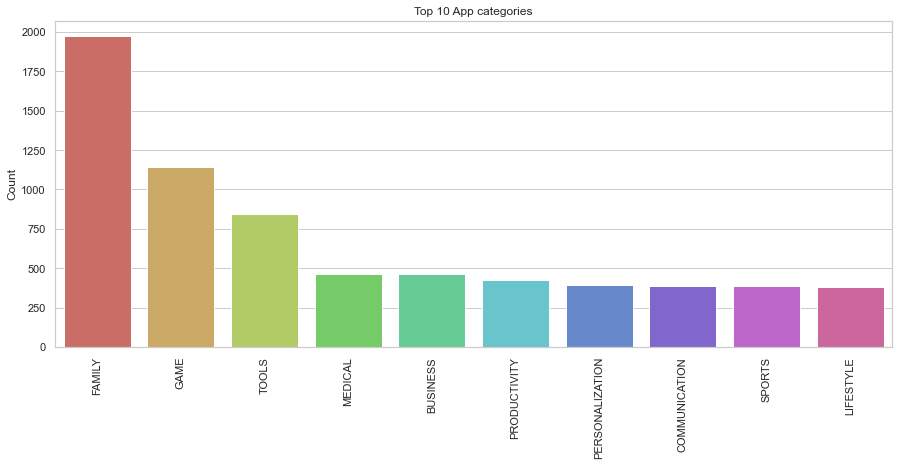

In [15]:
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='Count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

```
Family category has the most number of apps with 18% of apps belonging to it followed by Games category which has 11% of the apps.Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.
```

### 2. Rating


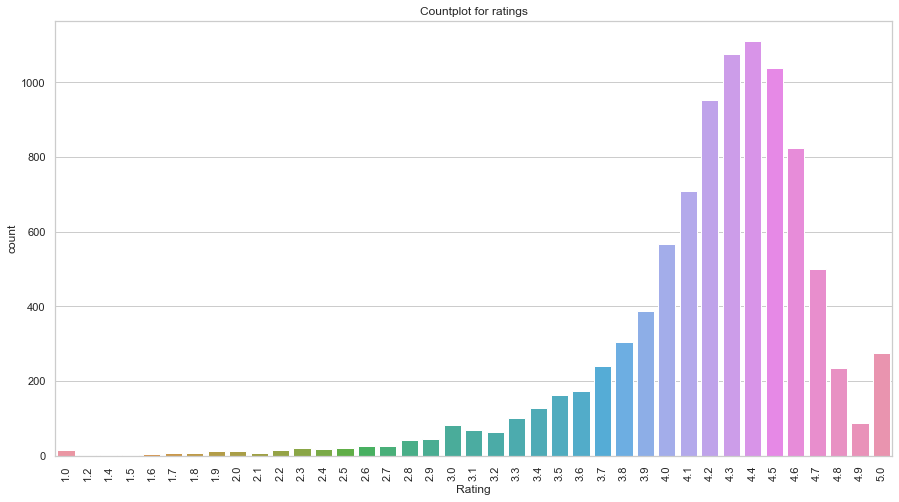

In [16]:
plt.figure(figsize=(15,8))
sns.countplot(x='Rating',data = df)
plt.xticks(rotation =90)
plt.title('Countplot for ratings')             
plt.show()

In [17]:
rating_greater_4 = len(df[df['Rating'] >= 4])/len(df)*100
print('Percentage of Apps having ratings of 4 or greater: {}%'.format(round(rating_greater_4,2)))

Percentage of Apps having ratings of 4 or greater: 67.97%


In [18]:
df[df['Rating'] == 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_log


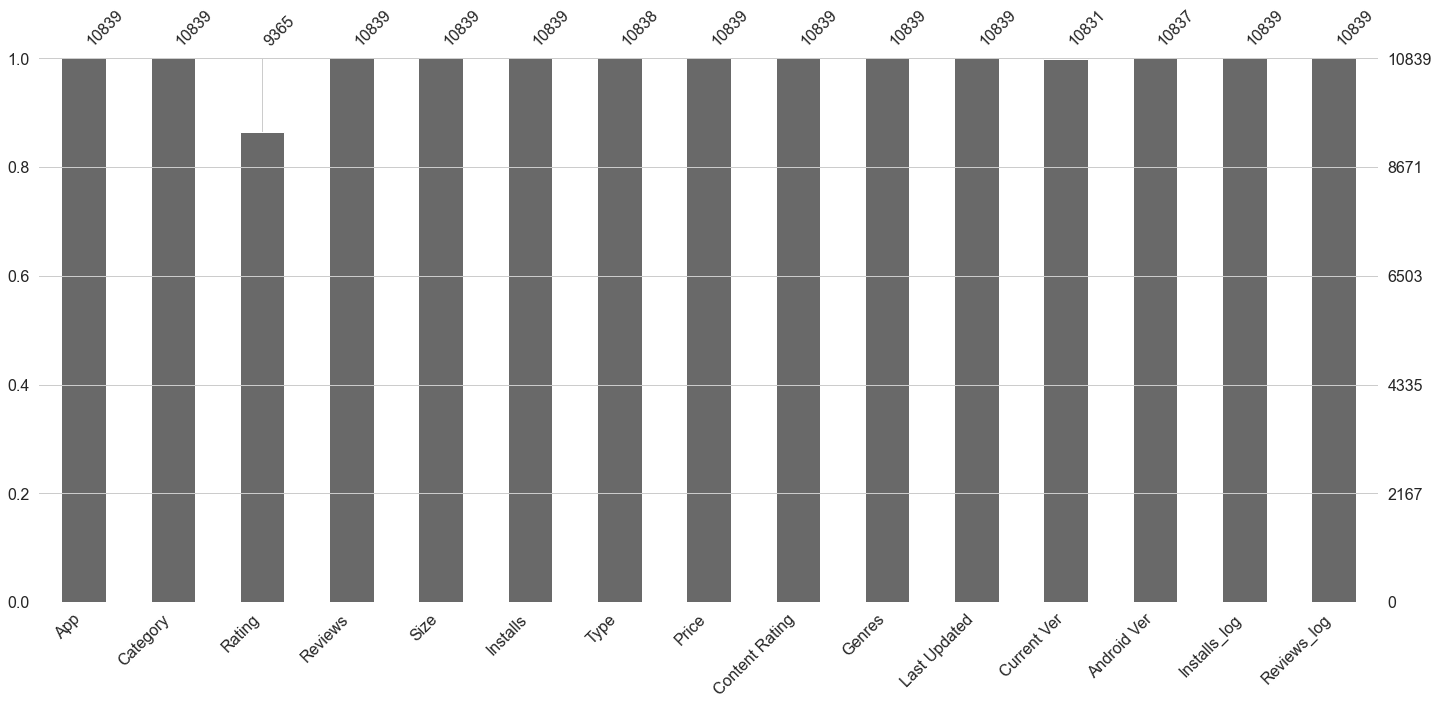

In [57]:
import missingno as msno
msno.bar(df)

In [63]:
df[df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_log,Reviews_log
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7,100000,Free,0.0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up,5.00000,1.785330
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7,100000,Free,0.0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up,5.00000,2.260071
123,Manicure - nail design,BEAUTY,NaN,119,3.7,50000,Free,0.0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up,4.69897,2.075547
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4,100000,Free,0.0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up,5.00000,2.815578
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9,10000,Free,0.0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up,4.00000,1.886491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82,10000,Free,0.0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up,4.00000,1.826075
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7,100,Free,0.0,Teen,Social,"February 2, 2018",1.0,4.0 and up,2.00000,0.845098
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8,5000,Free,0.0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up,3.69897,1.579784
10835,FR Forms,BUSINESS,NaN,0,9.6,10,Free,0.0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up,1.00000,0.000000


### 3.Size


```
In the Size columns either the size is given in MB or kB or it's written that the size varies with the device.
I have converted all the app sizes given in kB and MB to MB. Also 1 have used 1kB = 1000MB
```

In [19]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M',''))
df['Size'] = df['Size'].apply(lambda x: str(x).replace('k','e-3'))

In [20]:
#Converting the data type of Size category to float wherever possible
def convert(val):
    try:
        return float(val)
    except:
        return val
df['Size'] = df['Size'].apply(lambda x: convert(x))


In [21]:
#Seperate the apps whose size is given from those whose size varies with the device.
sized = df[df['Size'] != 'Varies with device'].copy()

In [22]:
sized['Size'] = pd.to_numeric(sized['Size'])

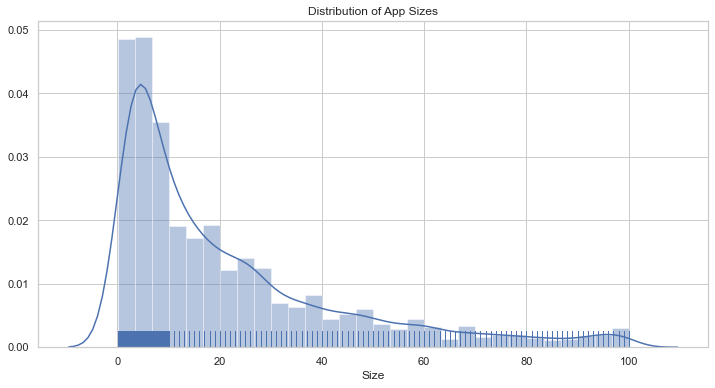

In [23]:
plt.figure(figsize=(12,6))
plt.title('Distribution of App Sizes')
sns.distplot(sized['Size'],bins = 30,rug=True)
plt.show()


```
In the dataset majority(88%) of the apps whose size are given have app size less than or equal to 50MB
```

# Reviews - 추가



In [24]:
# 형 변환 (object -> numeric)
df['Reviews'] = pd.to_numeric(df['Reviews'])
df.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10839, dtype: int64

In [25]:
df['Reviews_log'] = np.log10(df['Reviews'])

In [26]:
df['Reviews_log'].loc[df.Reviews_log == float('-inf')] = 0

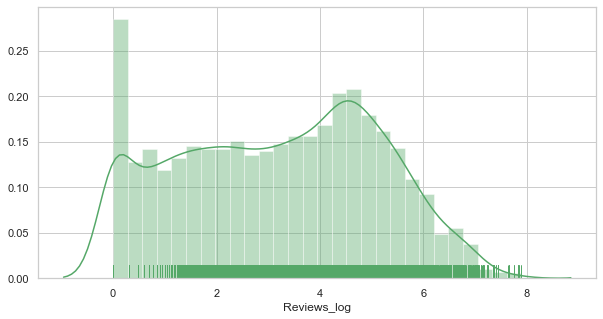

In [27]:
#histogram

plt.figure(figsize=(10,5))
sns.distplot(df['Reviews_log'],color='g',rug=True)

In [28]:
print("reviews_log 최소값 : {}, 최대값 : {}".format(df.Reviews_log.min(),df.Reviews_log.max()))

reviews_log 최소값 : 0.0, 최대값 : 7.892975137931482


# Reviews - Installs 추가



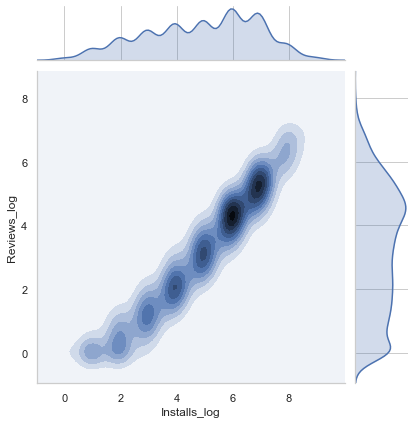

In [29]:
# kernel density function 적용

sns.jointplot(x="Installs_log", y="Reviews_log", data=df, kind='kde')

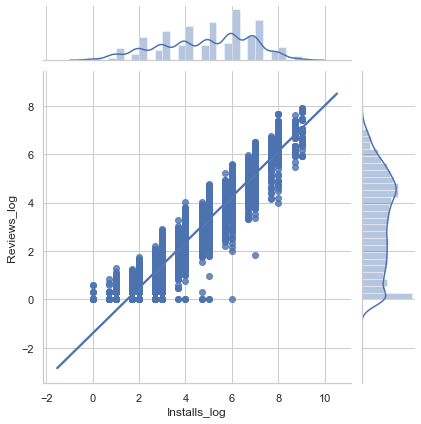

In [30]:
# joint scatter plot

sns.jointplot(x="Installs_log", y="Reviews_log", data=df, kind='reg')

In [31]:
df.corr()['Reviews_log']

Rating          0.209840
Reviews         0.289243
Installs        0.314729
Installs_log    0.962916
Reviews_log     1.000000
Name: Reviews_log, dtype: float64

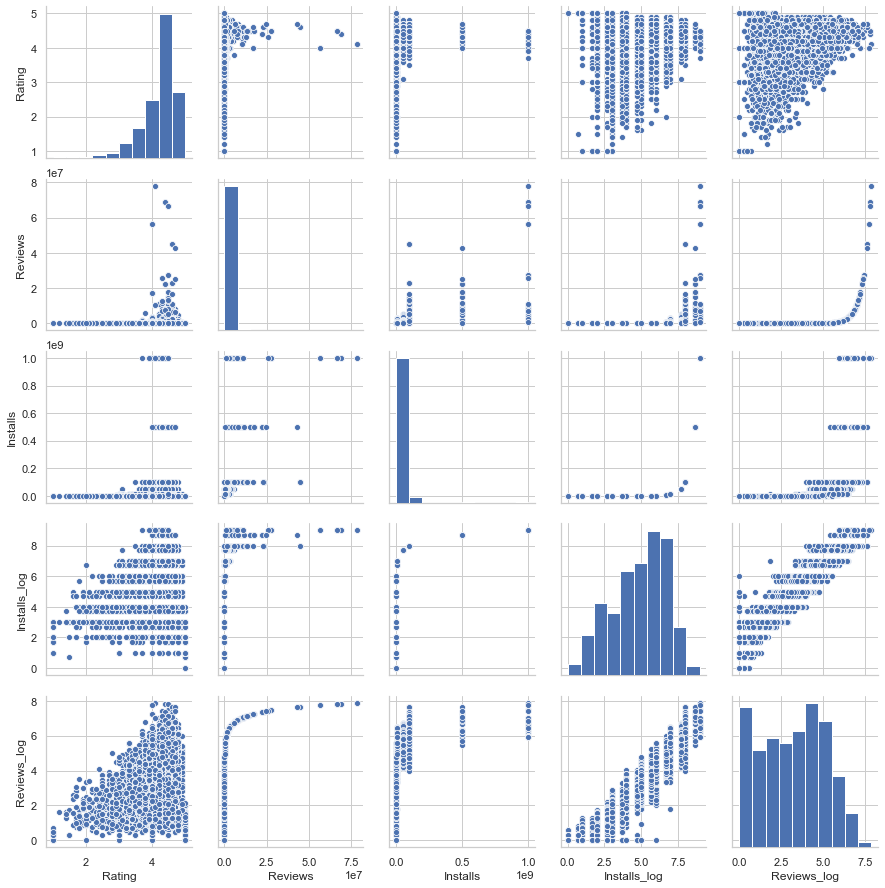

In [32]:
sns.pairplot(df)

# 혹시 모르니 reviews_log 로 rating, category 비교

# reviews_log <-> rating

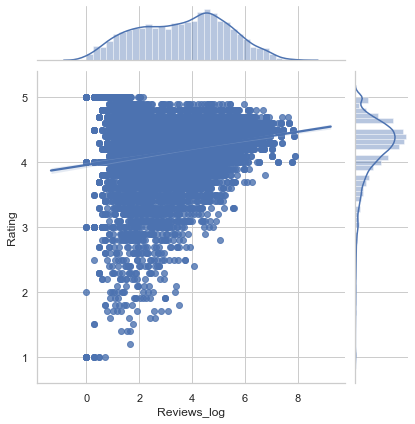

In [33]:
sns.jointplot(x="Reviews_log", y="Rating", data=df, kind='reg')

# reviews_log <-> category

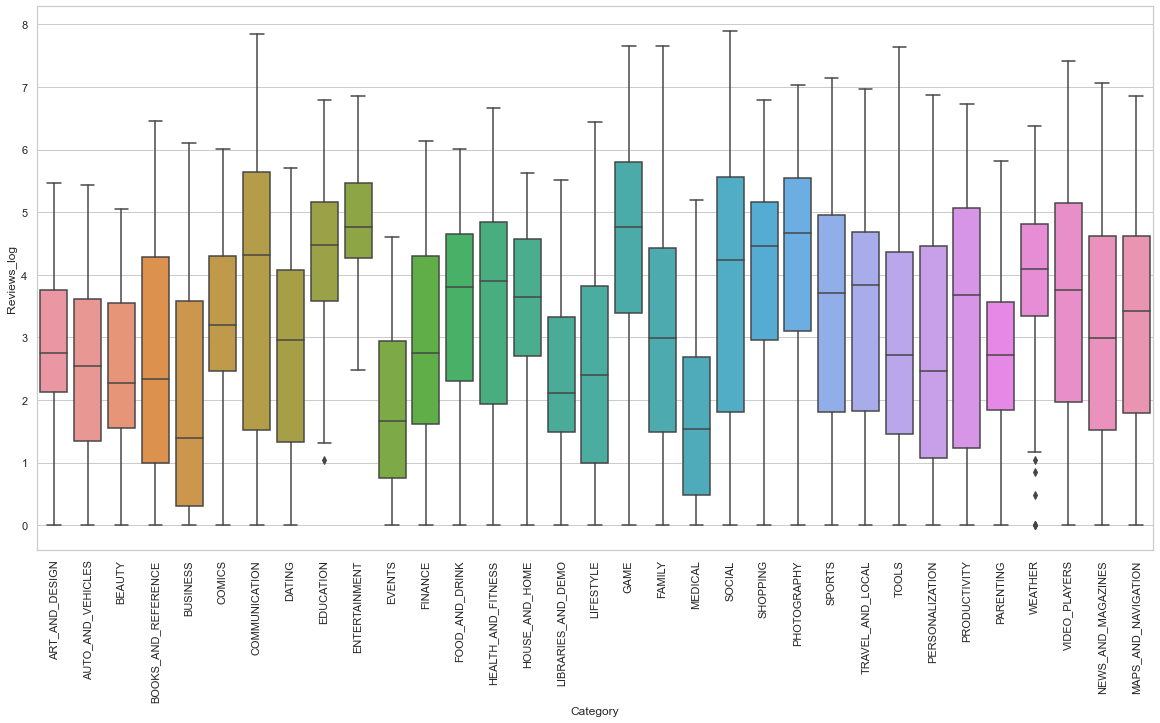

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Category", y="Reviews_log", data=df)
plt.xticks(rotation=90)
plt.show()

### 4. Installs

count    10839.000000
mean         4.880817
std          1.975355
min          0.000000
25%          3.000000
50%          5.000000
75%          6.698970
max          9.000000
Name: Installs_log, dtype: float64


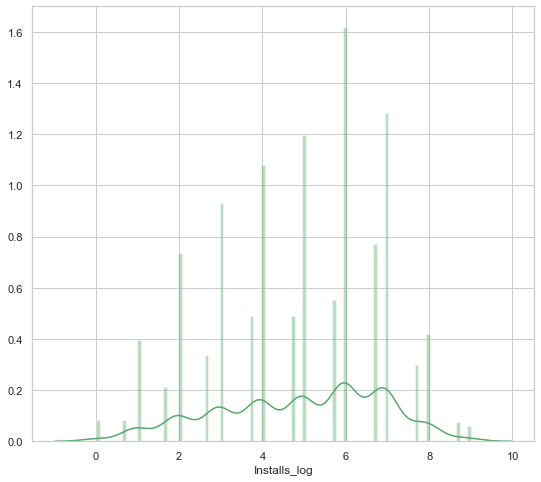

In [35]:
print(df['Installs_log'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Installs_log'], color='g', bins=100, hist_kws={'alpha': 0.4});

```
14.57% apps in the play store having more than 1,000,000 installs and 11.55% apps have more than 10,000,000+ downloads
```

### 5. Type


In [36]:
print('Apps on the basis of Type are classified as')
print('--------------------------------------------------------------------')

count = 1
for i in df['Type'].unique():
    print(count,': ',i)
    count = count + 1

Apps on the basis of Type are classified as
--------------------------------------------------------------------
1 :  Free
2 :  Paid
3 :  nan


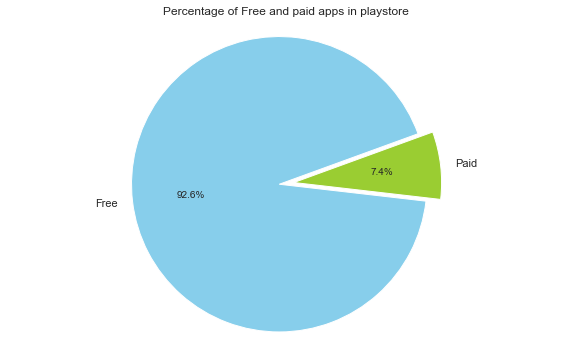

In [37]:
plt.figure(figsize=(10,6))

# Data to plot
labels = ['Free','Paid']
sizes = [len(df[df['Type'] == 'Free']),len(df[df['Type'] == 'Paid'])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.title('Percentage of Free and paid apps in playstore')
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', startangle=380,colors=colors,explode=explode)

plt.axis('equal')
plt.show()

```
Most of the apps in the app store are free.Only a small percentage of apps are paid apps.
```

### 6. Price

In [38]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$',''))
df['Price'] = pd.to_numeric(df['Price'])


#### Seperating paid apps from free apps



```
I have created a seperate dataset for paid apps from the whole playstore dataset
```

In [39]:
paid_apps = df[df['Price'] != 0]

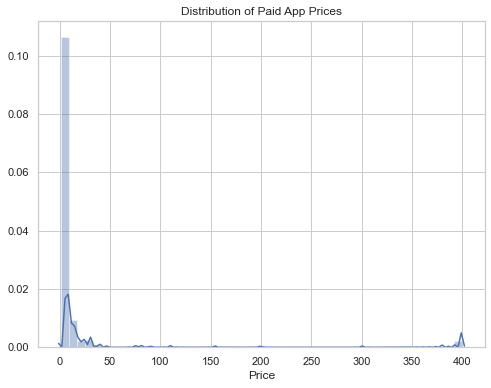

In [40]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Paid App Prices')
sns.distplot(paid_apps['Price'],bins=50)
plt.show()

In [41]:
price_less_10 = len(paid_apps[paid_apps['Price'] <= 10])/len(paid_apps)*100
print('Percentage of Apps having price less than 10$: {}%'.format(round(price_less_10,2)))

Percentage of Apps having price less than 10$: 88.88%


```
89% apps in the play store have a price tag of 10$ or less. Although some apps have price greater than 350\$

Checking apps having price greater than 350$
```

In [42]:
paid_apps[paid_apps['Price'] >= 350]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_log,Reviews_log
4197,most expensive app (H),FAMILY,4.3,6,1.5,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up,2.00000,0.778151
4362,💎 I'm rich,LIFESTYLE,3.8,718,26,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,4.00000,2.856124
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,4.00000,2.439333
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,5.00000,3.549861
5354,I am Rich Plus,FAMILY,4.0,856,8.7,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,4.00000,2.932474
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,4.69897,3.271144
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up,3.00000,1.612784
5358,I am Rich!,FINANCE,3.8,93,22,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up,3.00000,1.968483
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up,3.69897,2.673942
5362,I Am Rich Pro,FAMILY,4.4,201,2.7,5000,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up,3.69897,2.303196


```
We found that 16 apps by the name I am rich or having similar names have a price tage of 399$ and most of them even have 10,000+ downloads.
```

### 7. Content Rating


In [43]:
print('Apps on the basis of Content Rating are classified as')
print('-------------------------------------------------------------------')

count = 1
for i in df['Content Rating'].unique():
    print(count,': ',i)
    count = count + 1

Apps on the basis of Content Rating are classified as
-------------------------------------------------------------------
1 :  Everyone
2 :  Teen
3 :  Everyone 10+
4 :  Mature 17+
5 :  Adults only 18+
6 :  Unrated


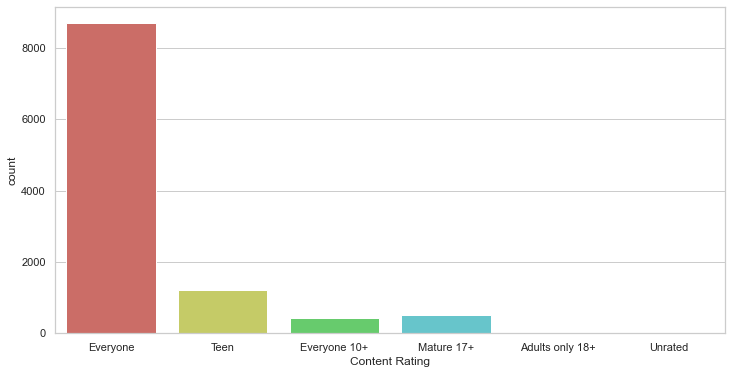

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Content Rating'],palette='hls')
plt.show()

In [45]:
print('Percentage of Apps having content rating as everyone: {}%'.format(round(len(df[df['Content Rating'] == 'Everyone'])/len(df)*100,2)))


Percentage of Apps having content rating as everyone: 80.39%


### 8. Genres


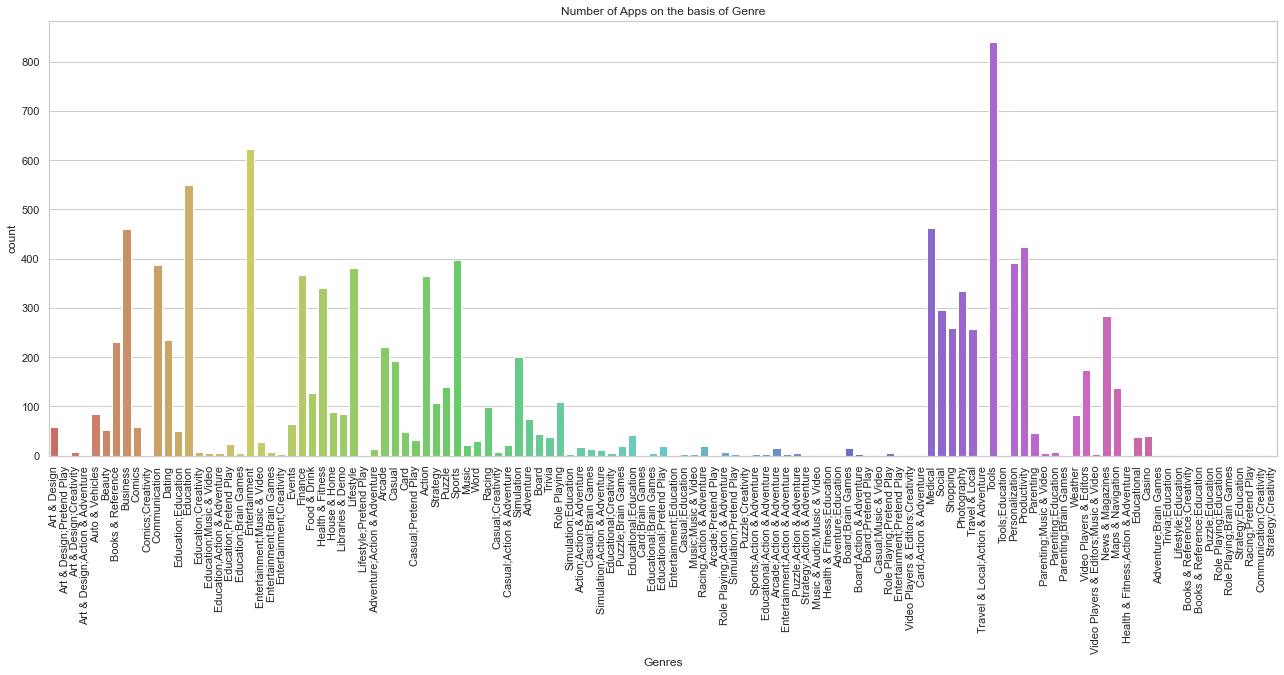

In [46]:
plt.figure(figsize=(22,8))
plt.title('Number of Apps on the basis of Genre')
sns.countplot(x='Genres',data = df,palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [47]:
print('Total Number of Genres: ',df['Genres'].nunique())


Total Number of Genres:  119


```
There are 119 Genres in the app store with the Tools Genre having the highest number of apps followed by Entertainment.
```

### 10. Current Version

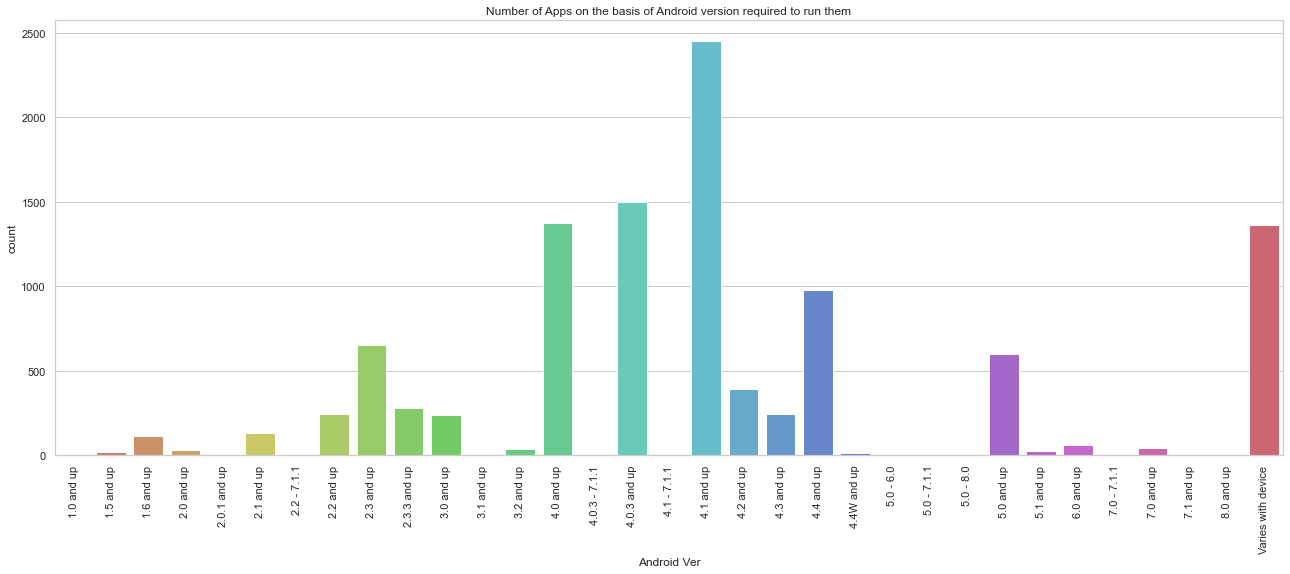

In [48]:
plt.figure(figsize=(22,8))
plt.title('Number of Apps on the basis of Android version required to run them')
sns.countplot(x='Android Ver',data = df.sort_values(by = 'Android Ver'),palette='hls')
plt.xticks(rotation = 90)

plt.show()

```
22.6% of the apps out of 10840 apps require android version 4.1 or greater version to work.
```

In [49]:
#function to convert columns to numeric data type from object data type
for i in df.columns:
    try:
        df[i] = pd.to_numeric(df[i])
    except:
        pass


### Relationships between different features¶


### 1. Rating vs. Category

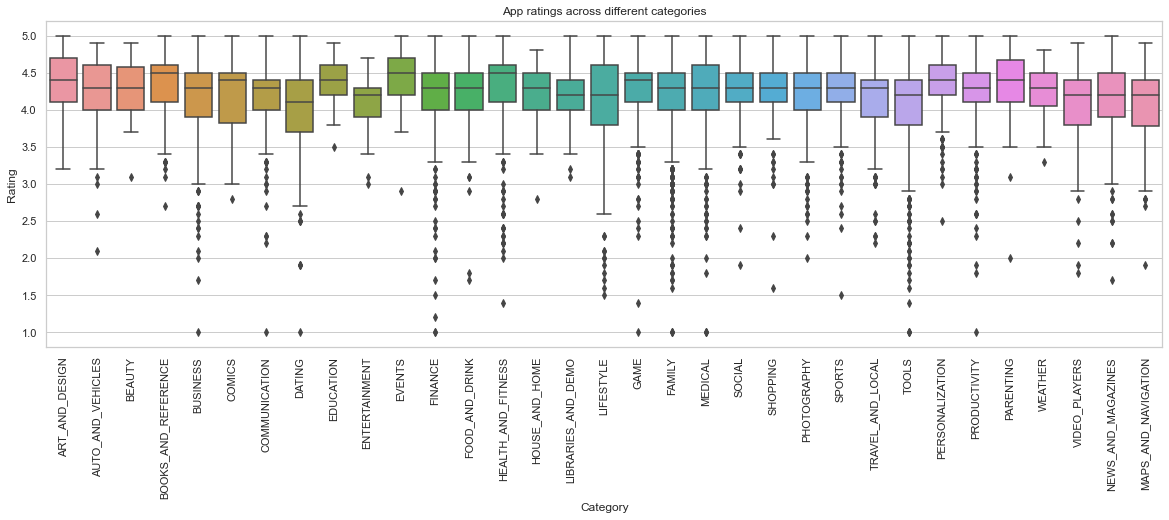

In [50]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Category',y='Rating',data = df)
plt.xticks(rotation=90)
plt.title('App ratings across different categories')
plt.show()


In [51]:
rating = pd.DataFrame(df['Rating'].describe()).T
rating

,count,mean,std,min,25%,50%,75%,max
Rating,9365.0,4.191757,0.515246,1.0,4.0,4.3,4.5,5.0


### Findings

```
The minimum and maximum rating an app can have are 1 and 5 respectively across all categories.
The mean rating of apps across all categories is 4.2 with a standard deviation of 0.51. Also, the median rating of apps across all categories is 4.3.
```

### Category vs. Reviews

In [52]:
#Number of apps having 0 reviews
len(df[df['Reviews'] == 0])
review_0_category = pd.DataFrame(df[df['Reviews'] == 0]['Category'].describe())
#App having maximum reviews.
max_review_app = df[df['Reviews'] == max(df['Reviews'])]

review_0_category
max_review_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs_log,Reviews_log
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,9.0,7.892975


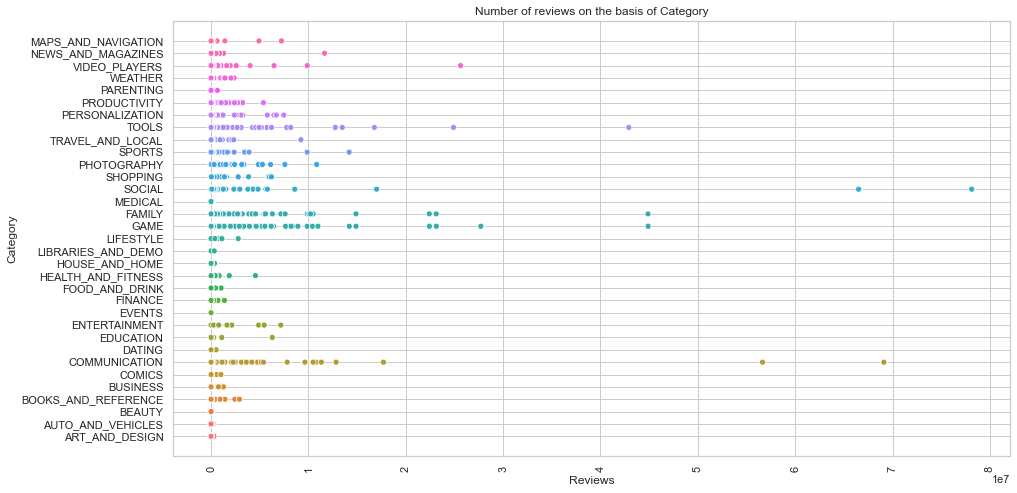

In [53]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.scatterplot(y='Category',x='Reviews',data = df,hue='Category',legend=False)
plt.xticks(rotation=90)
plt.title('Number of reviews on the basis of Category')
plt.show()

### Findings



1. Most of the apps across different categories have less than 10,000,000 reviews.
2. 596 apps have 0 reviews with most of the apps belonging to BUSINESS category.
3. The app having the maximum number of reviews(78158306) is Facebook which belong to the SOCIAL category.

The EDA is currently not complete and I will add more findings in the future.
Suggestions are welcome

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9365 non-null   float64
 3   Reviews         10839 non-null  int64  
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  int64  
 6   Type            10838 non-null  object 
 7   Price           10839 non-null  float64
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
 13  Installs_log    10839 non-null  float64
 14  Reviews_log     10839 non-null  float64
dtypes: float64(4), int64(2), object(9)
memory usage: 1.6+ MB
